In [1]:
%pip install -U scikit-plot

Requirement already up-to-date: scikit-plot in /opt/anaconda3/lib/python3.8/site-packages (0.3.7)
Note: you may need to restart the kernel to use updated packages.


In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from sklearn.metrics import r2_score, mean_squared_error, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import (
    LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor, Ridge)
#from pandas_profiling import ProfileReport
from sklearn.feature_selection import SelectKBest, f_regression
import scikitplot as skplt
from sklearn.preprocessing import Binarizer

In [84]:
#to Supress scientif format and help in comparison
pd.options.display.float_format = '{:.3f}'.format

In [85]:
df = pd.read_csv('../data/final_eda_base_data.csv', index_col= 0)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10005 entries, 0 to 10004
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   no_of_sales_12M_1                    10005 non-null  float64
 1   no_of_Redemption_12M_1               10005 non-null  float64
 2   no_of_sales_12M_10K                  10005 non-null  float64
 3   no_of_Redemption_12M_10K             10005 non-null  float64
 4   no_of_funds_sold_12M_1               10005 non-null  float64
 5   no_of_funds_redeemed_12M_1           10005 non-null  float64
 6   no_of_fund_sales_12M_10K             10005 non-null  float64
 7   no_of_funds_Redemption_12M_10K       10005 non-null  float64
 8   no_of_assetclass_sold_12M_1          10005 non-null  float64
 9   no_of_assetclass_redeemed_12M_1      10005 non-null  float64
 10  no_of_assetclass_sales_12M_10K       10005 non-null  float64
 11  no_of_assetclass_Redemption_

In [87]:
#df.drop(df.iloc[:, 22:40], inplace = True, axis=1)

In [88]:
# see the increase or decrease in Total sales

In [89]:
total_sales_2018 = df['sales_12M'].sum()
total_sales_2018_curr = df['sales_curr'].sum()
total_sales_2019 = df['sales_2019'].sum()

In [90]:
total_sales_2019 - 2160628225 

-19460114.22761917

In [91]:

#total sales increase in percentage: in 2018 - 2019
((total_sales_2019 - total_sales_2018 - total_sales_2018_curr)/(total_sales_2018 + total_sales_2018_curr))*100

12.406626312261182

In [92]:
((2160628225 - total_sales_2018 - total_sales_2018_curr)/(total_sales_2018+total_sales_2018_curr))*100

13.42823959753883

## As per the given data model predicts 13% increase in the sales from 2018 to 2019! which is significant

In [93]:
#Drop some highly correlated columns - 
#'no_of_sales_12M_10K' , 'no_of_Redemption_12M_10K', 'no_of_assetclass_sales_12M_10K', 'redemption_12M', 'redemption_12M'
#'no_of_fund_sales_12M_10K'

In [94]:
X = df.drop(['no_of_sales_12M_10K', 'no_of_Redemption_12M_10K', 'no_of_assetclass_sales_12M_10K', 'redemption_12M', 'redemption_12M','no_of_fund_sales_12M_10K'], axis=1, inplace= True)

In [95]:
X = df.drop(['Firm name'], axis = 1, inplace= True)

# Prepare the target variable for Regression and Classification

In [96]:
X = df.drop(['sales_2019', 'new_fund_2019'], axis=1)
y_reg = df['sales_2019']
y_cl = df['new_fund_2019']

In [97]:
X = (X-X.mean())/X.std()

In [98]:
#draw histogram to see the distribution

In [99]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10005 entries, 0 to 10004
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   no_of_sales_12M_1                    10005 non-null  float64
 1   no_of_Redemption_12M_1               10005 non-null  float64
 2   no_of_funds_sold_12M_1               10005 non-null  float64
 3   no_of_funds_redeemed_12M_1           10005 non-null  float64
 4   no_of_funds_Redemption_12M_10K       10005 non-null  float64
 5   no_of_assetclass_sold_12M_1          10005 non-null  float64
 6   no_of_assetclass_redeemed_12M_1      10005 non-null  float64
 7   no_of_assetclass_Redemption_12M_10K  10005 non-null  float64
 8   No_of_fund_curr                      10005 non-null  float64
 9   No_of_asset_curr                     10005 non-null  float64
 10  AUM                                  10005 non-null  float64
 11  sales_curr                  

In [100]:
## Decreasing the random state to 12 yeilds a better performance - .50 score on Test data

# Test-Train Split for Regression

In [101]:
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.25, random_state=20)

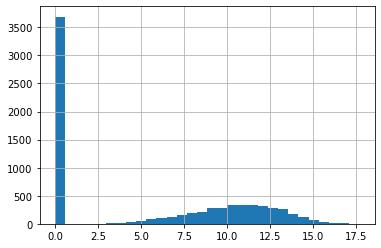

In [102]:
np.log1p(y_train_reg).hist(bins=30);

In [103]:
pred_baseline = np.ones(len(y_train_reg))*np.mean(y_train_reg)

In [104]:
r2_score(y_train_reg, pred_baseline)

0.0

In [105]:
mean_squared_error(y_train_reg, pred_baseline, squared= False)

1185311.8594254837

In [106]:
lr_pipeline = make_pipeline(PCA(0.8), LinearRegression())

In [107]:
X_train.describe()

,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,...,Channel_Networker,Channel_Private Client Group,Sub channel_Affiliated,Sub channel_DCIO,Sub channel_Global,Sub channel_IBD,Sub channel_NACS,Sub channel_Other,Sub channel_RIA,Sub channel_USBT
count,7503.000,7503.000,7503.000,7503.000,7503.000,7503.000,7503.000,7503.000,7503.000,7503.000,...,7503.000,7503.000,7503.000,7503.000,7503.000,7503.000,7503.000,7503.000,7503.000,7503.000
mean,0.003,0.006,-0.001,-0.001,0.002,-0.004,-0.006,-0.001,-0.003,-0.001,...,0.003,0.006,0.004,-0.010,0.006,-0.001,-0.001,0.006,0.005,-0.003
std,1.071,1.140,1.001,1.004,1.003,1.000,0.999,1.002,0.995,1.000,...,1.044,1.043,1.069,0.667,1.155,1.000,1.000,1.155,1.017,0.958
min,-0.204,-0.110,-0.571,-0.626,-0.447,-0.782,-0.866,-0.565,-0.684,-0.883,...,-0.033,-0.070,-0.026,-0.017,-0.017,-1.417,-0.666,-0.017,-0.150,-0.040
25%,-0.204,-0.110,-0.571,-0.626,-0.447,-0.782,-0.866,-0.565,-0.684,-0.883,...,-0.033,-0.070,-0.026,-0.017,-0.017,-1.417,-0.666,-0.017,-0.150,-0.040
50%,-0.204,-0.104,-0.571,-0.221,-0.447,-0.782,0.089,-0.565,-0.365,0.077,...,-0.033,-0.070,-0.026,-0.017,-0.017,0.706,-0.666,-0.017,-0.150,-0.040
75%,-0.123,-0.068,0.269,0.185,0.289,0.213,1.044,0.774,0.273,0.077,...,-0.033,-0.070,-0.026,-0.017,-0.017,0.706,1.501,-0.017,-0.150,-0.040
max,44.442,63.330,12.875,12.747,14.272,4.194,3.910,4.792,9.519,4.873,...,30.141,14.254,37.791,57.738,57.738,0.706,1.501,57.738,6.684,24.985


In [108]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7503 entries, 6967 to 4367
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   no_of_sales_12M_1                    7503 non-null   float64
 1   no_of_Redemption_12M_1               7503 non-null   float64
 2   no_of_funds_sold_12M_1               7503 non-null   float64
 3   no_of_funds_redeemed_12M_1           7503 non-null   float64
 4   no_of_funds_Redemption_12M_10K       7503 non-null   float64
 5   no_of_assetclass_sold_12M_1          7503 non-null   float64
 6   no_of_assetclass_redeemed_12M_1      7503 non-null   float64
 7   no_of_assetclass_Redemption_12M_10K  7503 non-null   float64
 8   No_of_fund_curr                      7503 non-null   float64
 9   No_of_asset_curr                     7503 non-null   float64
 10  AUM                                  7503 non-null   float64
 11  sales_curr                 

In [109]:
##Write the X_train to a CSV for easy comparison

In [110]:
X_train.to_excel('../data/X_train-for-comparison.xlsx')

In [111]:
## Selecting K best columns in X_train

In [112]:
X_new = SelectKBest(f_regression, k =16).fit_transform(X_train, y_train_reg)

In [113]:
#Convert Numpy array to pandas DataFrame to analyze better

In [172]:
df_X_Kbest = X[['no_of_sales_12M_1','no_of_Redemption_12M_1','no_of_funds_sold_12M_1',
                                  'no_of_funds_redeemed_12M_1','no_of_assetclass_sold_12M_1','no_of_assetclass_redeemed_12M_1',
                                  'No_of_fund_curr','No_of_asset_curr',  'AUM',
                                  'sales_curr','sales_12M','redemption_curr']]

In [173]:
df_X_Kbest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10005 entries, 0 to 10004
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   no_of_sales_12M_1                10005 non-null  float64
 1   no_of_Redemption_12M_1           10005 non-null  float64
 2   no_of_funds_sold_12M_1           10005 non-null  float64
 3   no_of_funds_redeemed_12M_1       10005 non-null  float64
 4   no_of_assetclass_sold_12M_1      10005 non-null  float64
 5   no_of_assetclass_redeemed_12M_1  10005 non-null  float64
 6   No_of_fund_curr                  10005 non-null  float64
 7   No_of_asset_curr                 10005 non-null  float64
 8   AUM                              10005 non-null  float64
 9   sales_curr                       10005 non-null  float64
 10  sales_12M                        10005 non-null  float64
 11  redemption_curr                  10005 non-null  float64
dtypes: float64(12)
mem

## These are the 16 best features as per SelectKBest 
no_of_sales_12M_1 -0.193845 0
no_of_Redemption_12M_1 -0.109508 1
no_of_funds_sold_12M_1 -0.151235 2

no_of_funds_redeemed_12M_1, (-0.625797) 3
no_of_funds_Redemption_12M_10K (-0.447401) 4 # not required as both above are co-related
no_of_assetclass_sold_12M_1 0.212778 5

no_of_assetclass_redeemed_12M_1 -0.866220 6
no_of_assetclass_Redemption_12M_10K  -0.565465 7 # not required as co-related
No_of_fund_curr -0.683590 8

No_of_asset_curr -0.882629 9
AUM,-0.162021 10
sales_curr,	  -0.089097 11

sales_12M,    -0.153225 12
redemption_curr,  0.094081 13
new_Fund_added_12M 0.423093 14

Channel_Networker -0.033175 15

In [116]:
## Evaluate model performance for only the select columns from selectkbest suggestion to see if the score increases

In [117]:
df_X_train_selectKbest = X_train[['no_of_sales_12M_1','no_of_Redemption_12M_1','no_of_funds_sold_12M_1',
                                  'no_of_funds_redeemed_12M_1','no_of_assetclass_sold_12M_1','no_of_assetclass_redeemed_12M_1',
                                  'No_of_fund_curr','No_of_asset_curr',  'AUM',
                                  'sales_curr','sales_12M','redemption_curr']]

In [118]:
df_X_train_selectKbest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7503 entries, 6967 to 4367
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   no_of_sales_12M_1                7503 non-null   float64
 1   no_of_Redemption_12M_1           7503 non-null   float64
 2   no_of_funds_sold_12M_1           7503 non-null   float64
 3   no_of_funds_redeemed_12M_1       7503 non-null   float64
 4   no_of_assetclass_sold_12M_1      7503 non-null   float64
 5   no_of_assetclass_redeemed_12M_1  7503 non-null   float64
 6   No_of_fund_curr                  7503 non-null   float64
 7   No_of_asset_curr                 7503 non-null   float64
 8   AUM                              7503 non-null   float64
 9   sales_curr                       7503 non-null   float64
 10  sales_12M                        7503 non-null   float64
 11  redemption_curr                  7503 non-null   float64
dtypes: float64(12)
me

In [119]:
df_X_test_selectKbest = X_test[['no_of_sales_12M_1','no_of_Redemption_12M_1','no_of_funds_sold_12M_1',
                                  'no_of_funds_redeemed_12M_1','no_of_assetclass_sold_12M_1','no_of_assetclass_redeemed_12M_1',
                                   'No_of_fund_curr','No_of_asset_curr', 'AUM',
                                  'sales_curr','sales_12M','redemption_curr']]

In [120]:
lr_pipeline.fit(df_X_train_selectKbest, y_train_reg)

Pipeline(steps=[('pca', PCA(n_components=0.8)),
                ('linearregression', LinearRegression())])

In [121]:
lr_pipeline.score(df_X_train_selectKbest, y_train_reg)

0.49226546796196813

In [122]:
lr_pipeline.score(df_X_test_selectKbest, y_test_reg)

0.4947272453219089

In [123]:
### - Model performance with only the features selected from selectkbest is .47 which is very minimal better than .46 without any pre-selection

In [124]:
lr_pipeline.fit(X_train, y_train_reg)

Pipeline(steps=[('pca', PCA(n_components=0.8)),
                ('linearregression', LinearRegression())])

In [125]:
lr_pipeline.score(X_train, y_train_reg)

0.49467781162185154

In [126]:
lr_pipeline.score(X_test, y_test_reg)

0.49940056729873794

In [127]:
## Total number of Principal components to explain a variation of 80%

In [128]:
lr_pipeline.named_steps['pca'].n_components_

15

In [129]:
np_PCA = lr_pipeline.named_steps['pca'].components_

In [130]:
np_PCA

array([[ 2.06916306e-01,  1.49382975e-01,  3.26551715e-01,
         3.36218257e-01,  3.07104920e-01,  3.06402772e-01,
         3.03114251e-01,  2.94311567e-01,  3.03460638e-01,
         2.49042403e-01,  1.64896647e-01,  1.29554557e-01,
         1.78618622e-01, -9.67957521e-02,  2.00414643e-01,
        -2.26779902e-02, -2.03425879e-02, -1.44125440e-02,
        -2.29851664e-02, -8.79290473e-03, -8.75849187e-02,
        -8.74824355e-03, -4.84805341e-03,  1.24757285e-01,
         6.16113747e-02, -6.19069674e-03, -9.53783480e-03,
        -2.27867192e-03, -8.05805703e-03, -1.36830121e-01,
         1.36578232e-01, -4.21106804e-03, -3.68124013e-04,
         5.00581911e-02],
       [ 8.29649483e-02,  5.98077752e-02,  1.23619262e-01,
         1.11199211e-01,  7.34745189e-02,  8.70141206e-02,
         8.37247386e-02,  5.17847641e-02,  2.19340292e-04,
        -1.21061591e-02, -1.87352609e-02,  3.95800857e-02,
         2.58520804e-02, -2.34324849e-02,  1.25767860e-01,
        -1.77633279e-02, -9.84

In [131]:
## convert the 

In [132]:
df_PCA = pd.DataFrame(np_PCA)

In [133]:
df_PCA.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.207,0.149,0.327,0.336,0.307,0.306,0.303,0.294,0.303,0.249,...,0.062,-0.006,-0.010,-0.002,-0.008,-0.137,0.137,-0.004,-0.000,0.050
1,0.083,0.060,0.124,0.111,0.073,0.087,0.084,0.052,0.000,-0.012,...,0.040,-0.085,-0.024,-0.001,-0.042,0.491,-0.486,-0.020,-0.048,0.037
2,0.111,0.163,-0.101,-0.042,0.062,-0.162,-0.139,-0.045,-0.096,-0.149,...,0.385,0.013,0.024,0.001,0.332,0.004,-0.078,0.217,0.076,0.320
3,-0.071,-0.111,0.083,0.046,-0.017,0.112,0.096,0.039,0.064,0.095,...,-0.150,-0.021,-0.022,-0.001,0.613,0.008,-0.004,0.155,-0.059,-0.150
4,0.249,0.296,-0.024,-0.072,-0.124,-0.056,-0.086,-0.081,-0.017,0.001,...,-0.534,0.009,0.019,0.000,0.122,0.046,-0.040,-0.190,0.107,-0.456


In [134]:
import scikitplot as skplt

In [135]:
import matplotlib.pyplot as plt

In [136]:
y_test_reg_preds = lr_pipeline.predict(X_test)

In [137]:
y_test_reg_preds.sum()

519033263.6208689

In [138]:
#skplt.metrics.plot_lift_curve(y_test, y_test_reg_preds)

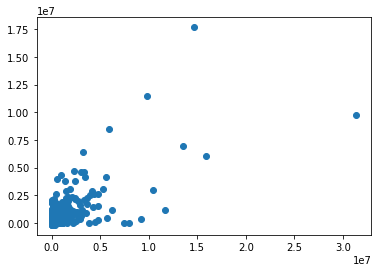

In [139]:
plt.scatter(y_test_reg,y_test_reg_preds)

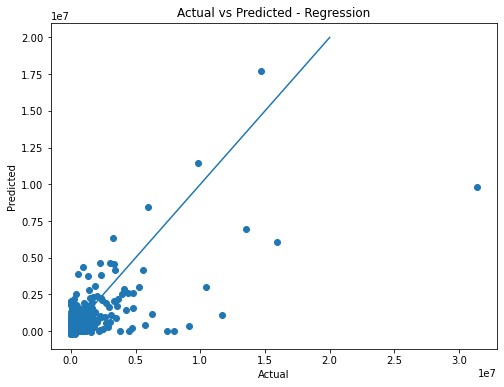

In [140]:
fig, axes = plt.subplots(figsize=(8, 6))

axes.scatter(x=y_test_reg, y=y_test_reg_preds)

axes.plot([0, 20000000], [0,20000000])
axes.set_title("Actual vs Predicted - Regression")
axes.set_xlabel("Actual")
axes.set_ylabel("Predicted");

In [141]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

zsh:1: no matches found: pandas-profiling[notebook]
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


## How does our model perform predictions and how far off is it on the Testing data set

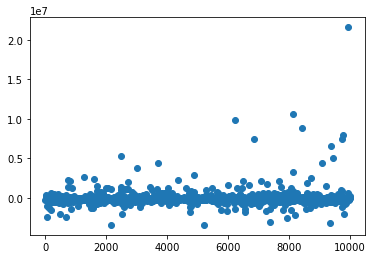

In [142]:
g=plt.plot(y_test_reg - y_test_reg_preds,marker='o',linestyle='')

In [143]:
#skplt.metrics.plot_lift_curve(y_test_cl, y_test_cl_preds);

## make function to output deciles

In [144]:
def output_deciles(model, X, y):
    results = pd.DataFrame(model.predict(X), index = X.index, columns = ['predictions'])
    results['actual'] = y.values
    results['deciles'] = pd.qcut(results['predictions'],10, labels= False)
    #results['contact_id'] = results.index.map(adviser_lookup)
    return results

In [145]:
regression_deciles = output_deciles(lr_pipeline,X_test,y_test_reg )

In [146]:
regression_deciles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2502 entries, 6697 to 347
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   predictions  2502 non-null   float64
 1   actual       2502 non-null   float64
 2   deciles      2502 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 78.2 KB


In [147]:
regression_deciles.groupby('deciles')[['actual','predictions']].mean()

,actual,predictions
deciles,,
0,23733.164,-36098.569
1,28237.834,-10015.310
2,80510.085,-3914.011
3,54562.438,16505.585
4,38672.029,38046.770
5,48406.378,63742.640
6,45396.855,104619.085
7,95153.898,184676.484
8,284951.861,336603.153


# Classification models - to predict the probability of adding new funds in 2019

##prepare the test train split for classification

In [148]:
#y_cl = df['new_fund_2019']
y_cl.head

<bound method NDFrame.head of 0       0.000
1       0.000
2       0.000
3       1.000
4       0.000
         ... 
10000   4.000
10001   4.000
10002   3.000
10003   0.000
10004   0.000
Name: new_fund_2019, Length: 10005, dtype: float64>

In [232]:
#makes the colums 0 or 1 depending on whether values are greater than or equal to 0 - df_X_Kbest

In [241]:
y_cl_binarized = np.where(y_cl > 0, 1,0)

In [248]:
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X, y_cl_binarized, test_size=0.25, random_state=20)

In [249]:
rf_cl = RandomForestClassifier(max_depth= 4)

In [250]:
#Fit the training set

In [251]:
rf_cl.fit(X_train_cl, y_train_cl)

RandomForestClassifier(max_depth=4)

In [252]:
#Score the testing set - with max_depth= 5 there could be slight overfitting.

In [253]:
rf_cl.score(X_test_cl, y_test_cl)

0.7561950439648282

In [271]:
cl_preds = rf_cl.predict(X)

In [275]:
pd.value_counts(cl_preds)

0    9782
1     223
dtype: int64

In [276]:
pd.value_counts(y_cl_binarized)

0    7484
1    2521
dtype: int64

In [273]:
print(classification_report(cl_preds ,y_cl_binarized))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86      9782
           1       0.06      0.70      0.11       223

    accuracy                           0.76     10005
   macro avg       0.53      0.73      0.49     10005
weighted avg       0.97      0.76      0.84     10005



# Final predictions - combining Regression and Classification

STEP 1 : select the advisors that sold anything - coming from Regression Model